In [163]:
#Exportacion de las librerias
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#librerias para implementar modelos de ciencia de datos
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder


#lecturfrom sklearn.metrics import mean_squared_error, r2_score
a de datos en python y lo cargamos en la variable datos
datos = pd.read_csv('C:/Users/usuario/ANALISIS DE DATOS/Cardetailsv3.csv')

#realizamos la lectura de los datos para el analisis exploratorio
datos.head(50)

SyntaxError: invalid syntax (578192123.py, line 18)

In [5]:
#Descripcion de los datos
datos.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y atipicos')

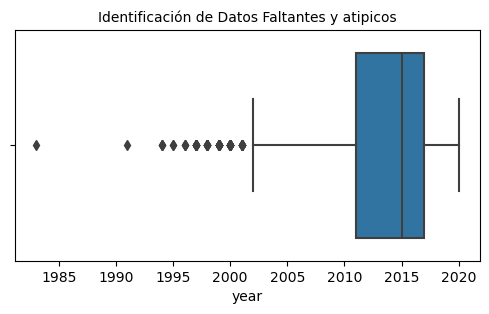

In [6]:
#idetificacion de datos faltantes y atipicos

plt.figure(figsize=(6,3)) #tamaño de figura
sns.boxplot(x=datos['year'])
plt.title('Identificación de Datos Faltantes y atipicos', fontsize=10) # titulo de la grafica


Text(0.5, 1.0, 'Identificación de Datos Faltantes y atipicos')

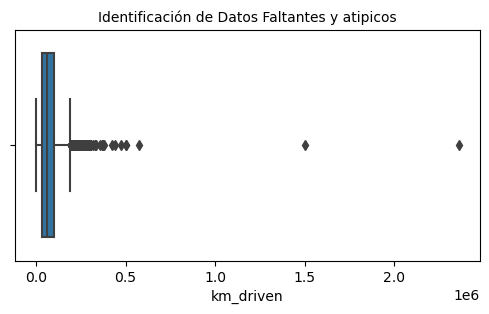

In [9]:
#idetificacion de datos faltantes y atipicos

plt.figure(figsize=(6,3)) #tamaño de figura
sns.boxplot(x=datos['km_driven'])
plt.title('Identificación de Datos Faltantes y atipicos', fontsize=10) # titulo de la grafica


In [13]:
# Revision de datos faltantes
print("Cantidad de registros con cero en name", datos['name'].isin([0]).sum())
print("Cantidad de registros con cero en year)", datos['year'].isin([0]).sum())
print("Cantidad de registros con cero en selling_price", datos['selling_price'].isin([0]).sum())
print("Cantidad de registros con cero en km_driven", datos['km_driven'].isin([0]).sum())
print("Cantidad de registros con cero en fuel", datos['fuel'].isin([0]).sum())
print("Cantidad de registros con cero en seller_type", datos['seller_type'].isin([0]).sum())
print("Cantidad de registros con cero en transmission", datos['transmission'].isin([0]).sum())
print("Cantidad de registros con cero en mileage", datos['mileage'].isin([0]).sum())
print("Cantidad de registros con cero en engine", datos['engine'].isin([0]).sum())
print("Cantidad de registros con cero en max_power", datos['max_power'].isin([0]).sum())
print("Cantidad de registros con cero en torque", datos['torque'].isin([0]).sum())
print("Cantidad de registros con cero en seats", datos['seats'].isin([0]).sum())


Cantidad de registros con cero en name 0
Cantidad de registros con cero en year) 0
Cantidad de registros con cero en selling_price 0
Cantidad de registros con cero en km_driven 0
Cantidad de registros con cero en fuel 0
Cantidad de registros con cero en seller_type 0
Cantidad de registros con cero en transmission 0
Cantidad de registros con cero en mileage 0
Cantidad de registros con cero en engine 0
Cantidad de registros con cero en max_power 0
Cantidad de registros con cero en torque 0
Cantidad de registros con cero en seats 0


In [ ]:
# No se identifican datos faltantes en el actual dataset

Text(0.5, 1.0, 'Identificación de Datos Atipicos')

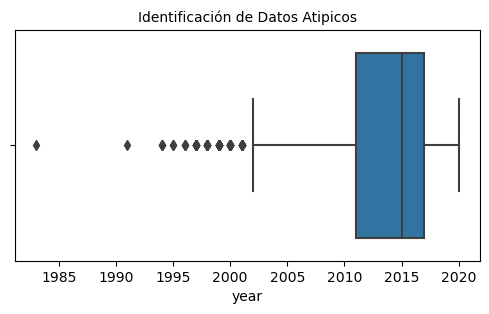

In [14]:
#Identificación de datos Atipicos


plt.figure(figsize=(6,3)) #tamaño de figura
sns.boxplot(x=datos['year'])
plt.title('Identificación de Datos Atipicos', fontsize=10) # titulo de la grafica

In [20]:
#conteo de datos atipicos
minimo=1990
maximo=2024
atipicos=((datos['year']<minimo)|(datos['year']>maximo)).sum()
print("El total de datos atípicos es {}".format(atipicos))

El total de datos atípicos es 1


In [25]:
# filtrar datos atipicos
datos=datos[(datos['year']<maximo)&(datos['year']>minimo)]

In [22]:
#validar si se removieron los datos atipicos
atipicos=((datos['year']<minimo)|(datos['year']>maximo)).sum()
print("El total de datos atípicos es {}".format(atipicos))

El total de datos atípicos es 0


In [26]:
#Revisión del tipo de datos y datos faltantes
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8127 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8127 non-null   object 
 1   year           8127 non-null   int64  
 2   selling_price  8127 non-null   int64  
 3   km_driven      8127 non-null   int64  
 4   fuel           8127 non-null   object 
 5   seller_type    8127 non-null   object 
 6   transmission   8127 non-null   object 
 7   owner          8127 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 888.9+ KB


In [32]:
# variable de precios de los carros
datos['selling_price'].value_counts()

selling_price
300000     226
600000     213
350000     209
550000     204
450000     195
          ... 
308000       1
3900000      1
2850000      1
39000        1
746000       1
Name: count, Length: 677, dtype: int64

In [144]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%
# se crean variables X y Y para almacenar la información del entrenamiento

X = datos.drop('selling_price',axis=1) 
Y = datos['selling_price'] 

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

#impresion de resultados X_train
print (X_train)

                                         name  year  km_driven    fuel  \
4313                        Hyundai i10 Magna  2012      40000  Petrol   
5178       Mercedes-Benz New C-Class 200 K AT  2007     120000  Petrol   
758                        Hyundai EON D Lite  2013      80000  Petrol   
7117  Chevrolet Tavera Neo 3 LT 9 Seats BSIII  2016     100000  Diesel   
2606                         Maruti Swift VDI  2013      77000  Diesel   
...                                       ...   ...        ...     ...   
4931    Tata Manza Aura (ABS) Quadrajet BS IV  2012      70000  Diesel   
3264                     Ford Figo Diesel EXI  2012     100000  Diesel   
1653                Hyundai i10 Sportz Option  2009      90000  Petrol   
2607         Volkswagen Vento Diesel Highline  2012      90000  Diesel   
2732                   Hyundai i10 Magna 1.1L  2012     110000  Petrol   

     seller_type transmission         owner     mileage   engine  max_power  \
4313  Individual       Manual   

In [173]:
#impresion de resultados Y_train
print (Y_train)

4313    267000
5178    500000
758     200000
7117    900000
2606    375000
         ...  
4931    300000
3264    220000
1653    170000
2607    375000
2732    225000
Name: selling_price, Length: 6096, dtype: int64


In [152]:
# Combina los conjuntos de datos de entrenamiento y prueba
X_combined = pd.concat([X_train, X_test], axis=0)

# Ajusta y transforma las características categóricas en el conjunto combinado
X_combined_encoded = encoder.fit_transform(X_combined)

# Divide el conjunto combinado nuevamente en conjuntos de entrenamiento y prueba
X_train_encoded = X_combined_encoded[:len(X_train)]
X_test_encoded = X_combined_encoded[len(X_train):]

# Construir el modelo de regresión lineal
regresion = LinearRegression()
regresion.fit(X_train_encoded, Y_train)

# Realiza predicciones en el conjunto de prueba
prediccion = regresion.predict(X_test_encoded)

#impresion de resultados
print(Y_test)


3558     345000
233      900000
7952     475000
572      120000
6960    5150000
         ...   
2761      70000
1487     160000
4284     350000
5698     380000
4643     260000
Name: selling_price, Length: 2032, dtype: int64


In [154]:
#impresion de resultados de prediccion
print(prediccion)

[ 354897.67918661 1184716.25426756  474975.93887681 ...  176901.87516414
  337991.10856665  149571.37384542]


In [164]:
#Desempeño del modelo de regresion
# Calcula el error cuadrático medio
mse = mean_squared_error(Y_test, prediccion)
print("Error cuadrático medio:", mse)

# Calcular el coeficiente de determinación (R cuadrado)
r2 = r2_score(Y_test, prediccion)
print("Coeficiente de determinación (R cuadrado):", r2)


Error cuadrático medio: 70715440156.93329
Coeficiente de determinación (R cuadrado): 0.892916628141601


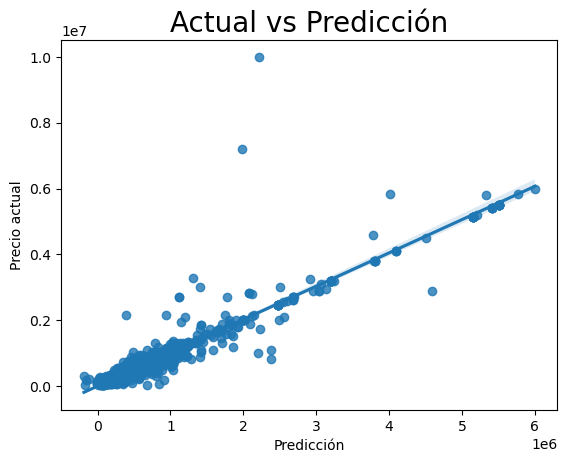

In [172]:
#grafica de regresion lineal
sns.regplot(x=prediccion, y=Y_test)
plt.title("Actual vs Predicción", fontsize=20)
plt.xlabel("Predicción")
plt.ylabel('Precio actual')
plt.show()